# =========================================
#  UAS PPDS                              
#  Nama   : Muhammad Fazri Nahar          
#  NIM    : J0303202170                   
#  Kelas  : TRPL 57 B P2                 
# =========================================


## Mempersiapkan Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)

import seaborn as sns 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

### Import file csv

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
print(df)

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


#### Data Passengers merupakan data yang berisi jumlah penumpang setiap bulannya yang di ambil mulai tahun 1949 hingga 1960


## 1) Pada bulan dan tahun berapa data terakhir ditunjukkan?

In [4]:
print(df.tail())

       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432


### Jawaban : Data terakhir merupakan data yang di ambil pada tahun 1960 , bulan 12

### =================================


## 2) Pada bulan apa yang memberikan jumlah penumpang terbanyak?

In [5]:
print(df.loc[df['#Passengers'].idxmax()],"\n")

Month          1960-07
#Passengers        622
Name: 138, dtype: object 



### Jawaban 1 : Jika kita mengambil salah satu bulan dengan penumpang terbanyak, maka bulan 7 pada tahun 1960 merupakan jumlah terbanyak dengan total sebanyak 622 

### Bagaimana jika kita menggabungkan setiap bulan dengan menjumlahkan total penumpang pada setiap tahun?

In [6]:
df['Month'] = pd.to_datetime(df['Month'],format='%Y-%m') 
print(df.head()) 

       Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121


In [7]:
mp = df.groupby(df["Month"].dt.month)['#Passengers'].sum().reset_index(name="Total Passenger")
print(mp)

    Month  Total Passenger
0       1             2901
1       2             2820
2       3             3242
3       4             3205
4       5             3262
5       6             3740
6       7             4216
7       8             4213
8       9             3629
9      10             3199
10     11             2794
11     12             3142


#### Membuat Grafik

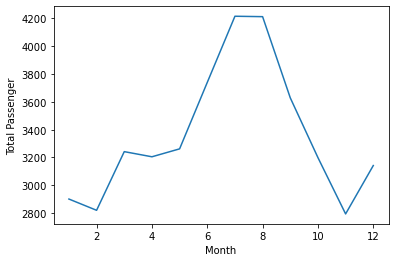

In [8]:
xpoints = mp["Month"]
ypoints = mp["Total Passenger"]

plt.plot(xpoints, ypoints)
plt.xlabel("Month")
plt.ylabel("Total Passenger")
plt.show()

#### pada grafi kurang terlihat jelas, maka langsung saja kita melihat nilai terbesar

In [9]:
print(mp.loc[mp['Total Passenger'].idxmax()])

Month                 7
Total Passenger    4216
Name: 6, dtype: int64


### Jawaban 2 : Maka bulan ke-7 dengan jumlah total 4216 penumpang menjadi nilai terbanyak

### =================================

## 3) Berapa total data pada data penumpang ini?

In [10]:
print(df.tail())


         Month  #Passengers
139 1960-08-01          606
140 1960-09-01          508
141 1960-10-01          461
142 1960-11-01          390
143 1960-12-01          432


### Jika pada index 143, maka total data adalah index+1 = 144 Data

### =================================


# Forecasting

## ===== Exploratory Data Analysis (EDA)  =====
#### Exploratory Data Analysis (EDA) adalah bagian dari proses data science. EDA menjadi sangat penting sebelum melakukan feature engineering dan modeling karena dalam tahap ini kita harus memahami datanya terlebih dahulu.
#### Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. Dalam prakteknya, curiousity sangat penting dalam proses ini, pemahaman konteks data juga diperhatikan, karena akan menjawab masalah masalah dasar.

In [11]:
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


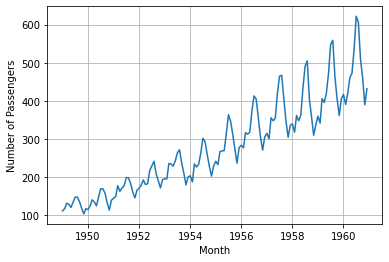

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
x = df['Month']
y = df['#Passengers']
sns.lineplot(x=x,y=y)
plt.ylabel("Number of Passengers")
plt.grid()
plt.show()

#### Pada Grafik menunjukan bahwa data tersebut memiliki karakteristik Trend + Seasonal

#### Tipe data seasonal ialah ketika observasi dipengaruhi oleh musiman, yang ditandai dengan adanya pola perubahan yang berulang secara otomatis dari tahun ke tahun. Sebagai contoh adalah pola data pembelian buku baru pada tahun ajaran baru.

#### Di tambah dengan trend yaitu ketika observasi naik atau menurun pada perluasan periode suatu waktu.

## 4) Namun Apakah Data tersebut merupakan Stasioner?

### ==== UJI Dicky Fuller ====

#### Ada dua cara utama untuk menentukan apakah Time Series merupakan stasioner.

#### - Rolling Statics = Deret waktu dikatakan stasioner jika tetap konstan terhadap waktu (dengan mata telanjang lihat apakah garisnya lurus dan sejajar dengan sumbu x).

#### - Augmented Dickey-Fuller Test : Deret waktu dianggap stasioner jika nilai-p rendah (menurut hipotesis nol) dan nilai kritis pada interval kepercayaan 1%, 5%, 10% sedekat mungkin dengan Statistik ADF

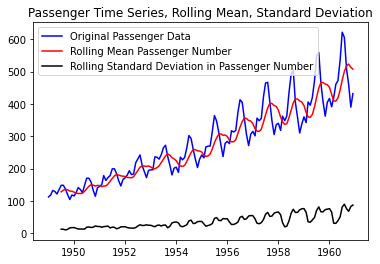

In [13]:
rolling_mean = df['#Passengers'].rolling(7).mean()
rolling_std = df['#Passengers'].rolling(7).std()

xpoints = df["Month"]
ypoints = df["#Passengers"]

plt.plot(xpoints, ypoints, color="blue",label="Original Passenger Data")
plt.plot(xpoints,rolling_mean, color="red", label="Rolling Mean Passenger Number")
plt.plot(xpoints,rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

#### Seperti yang kita lihat, rolling mean dan rolling standar deviasi meningkat seiring waktu. Oleh karena itu, dapat disimpulkan bahwa deret waktu tidak stasioner.

In [14]:
from statsmodels.tsa.stattools import adfuller

adft = adfuller(df["Month"],autolag="AIC")
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

       Values                       Metric
0    0.418755              Test Statistics
1    0.982183                      p-value
2   12.000000             No. of lags used
3  131.000000  Number of observations used
4   -3.481282          critical value (1%)
5   -2.883868          critical value (5%)
6   -2.578677         critical value (10%)


#### Statistik ADF jauh dari nilai kritis (-1 , 0 , 1) yaitu 0,98 dimana sudah mendekati 1  dan nilai p lebih besar dari ambang batas (0,05). Dengan demikian, dapat disimpulkan bahwa deret waktu tidak stasioner.

#

### ==== Autocorrelation ====

#### Memeriksa data deret waktu untuk autokorelasi dengan Python adalah bagian penting lainnya dari proses analitik. Ini adalah ukuran seberapa korelasi data deret waktu pada titik waktu tertentu dengan nilai masa lalu, yang memiliki implikasi besar di banyak industri.

#### Misalnya, jika data penumpang kita memiliki autokorelasi yang kuat, kita dapat mengasumsikan bahwa jumlah penumpang yang tinggi hari ini menunjukkan kemungkinan yang kuat bahwa besok juga akan tinggi.
#### Mari kita lakukan ini untuk jeda (lag) satu bulan, enam bulan dan Sembilan bulan dengan menggunakan lag =1, lag = 6, lag = 9

In [15]:
autocorrelation_lag1 = df['#Passengers'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)
autocorrelation_lag3 = df['#Passengers'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)
autocorrelation_lag6 = df['#Passengers'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)
autocorrelation_lag9 = df['#Passengers'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9) 

One Month Lag:  0.9601946480498527
Three Month Lag:  0.8373947650817942
Six Month Lag:  0.7839187959206185
Nine Month Lag:  0.8278519011167602


#### Kita dapat lihat bahwa dengan menggunakan lag=9 datanya sangat auto korelasi. Ini adalah gambaran lebih lanjut dari tren jangka pendek dan jangka Panjang dalam data

#
### ==== Decomposition ====

#### Dekomposisi time series adalah teknik yang membagi deret waktu menjadi beberapa komponen. Masing-masing mewakili kategori pola dasar, tren, dan Seasonal

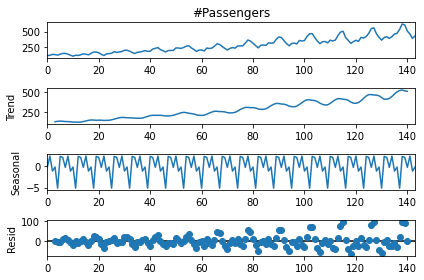

In [16]:
decompose = seasonal_decompose(df['#Passengers'],model='additive', period=7)
decompose.plot()
plt.show()
df['Date'] = df.index

#### Dari plot ini, kita dapat dengan jelas melihat tren peningkatan jumlah penumpang dan pola musiman dalam naik turunnya nilai setiap tahunnya.

#
# ===== Prediksi dengan Arima  =====

#### Arima memiliki model ARIMA = (p, d, q). p merupakan nilai Autoregressive atau ACF. D merupakan nilai differencing. Dan q merupakan nilai moving average atau PACFnya.

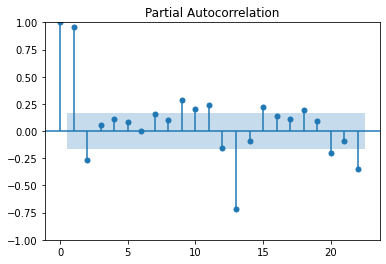

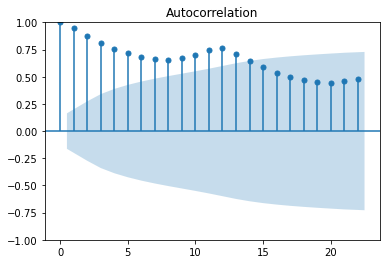

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_pacf(df['#Passengers']);
plot_acf(df['#Passengers']);

In [65]:
from pmdarima.arima import auto_arima

#### kali ini kita akan split 2 data yang akan menjadi data test dan juga data train
#### pada data train kita akan mengambil data yang memiliki waktu di bawah tahun 1960 bulan 8. dan sisanya dari bulan 8 hingga bulan 12 pada tahun 1960 akan menjadi data test untuk pengujian

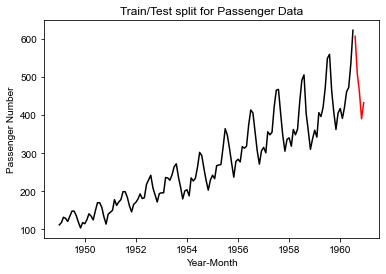

In [112]:
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime("1960-08", format='%Y-%m')]
train['train'] = train['#Passengers']
del train['Date']
del train['#Passengers']
test = df[df['Date'] >= pd.to_datetime("1960-08", format='%Y-%m')]
del test['Date']
test['test'] = test['#Passengers']
del test['#Passengers']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()

#### Pada grafik yang berwarna merah merupakan data yang training, dan yang berwarna merah adalah index data yang kita coba uji.
#### Dari pengujian ini kita dapat mengambil bahwa Algoritma Aritma cukup tepat untuk memprediksi data tersebut. pergerakan yang seosonal menjadi alasan mengapa Arima cukup tepat untuk menghasilkan nilai uji yang sama dengan data aslinya.

In [113]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1352.593, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1340.702, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1336.259, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1352.415, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1329.986, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1335.098, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1336.923, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1329.407, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1335.407, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1339.796, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1325.560, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1336.3

#### Pada bagian di atas, arima akan mencoba untuk mengiterasikan  dan mencari nilai AIC yang terkecil, dan kemudian didapatlah nilai (p,d,q) yang paling tepat yaitu (4,1,3)

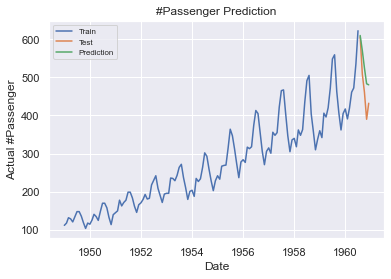

In [114]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('#Passenger Prediction')
plt.xlabel('Date')
plt.ylabel('Actual #Passenger')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#
#### ==== RMSE ====


#### RMSE merupakan salah satu metode untuk mengevaluasi kinerja dari Forecasting. Dengan metode ini kita akan membandingkan berapa hasil yang diprediksi dengan berapa hasil yang asli. Selisih inilah akan dijadikan matriks dan kemudian akan dihitung terhadap semua titik prediksi yang di jumlahkan dan kemudian dirata-ratakan.


In [115]:
from math import sqrt 
from sklearn.metrics import mean_squared_error 
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  61.36465395748654


#### Dan kita mendapatkan nilai 61.3 yang menjadi nilai pembeda antara nilai nyata dan juga nilai prediksi. 

#### Nilai RMSE terkecil merupakan nilai terbaik karena memiliki nilai prediksi error yang paling tipis atau paling kecil dari data asli

# ========= Percobaan Metode Lainnya =========

In [118]:
df_data = pd.read_csv("AirPassengers.csv")
df_data['nn'] = df_data.index + 1
df_data

,Month,#Passengers,nn
0,1949-01,112,1
1,1949-02,118,2
2,1949-03,132,3
3,1949-04,129,4
4,1949-05,121,5
...,...,...,...
139,1960-08,606,140
140,1960-09,508,141
141,1960-10,461,142
142,1960-11,390,143


In [120]:
X_train = df_data[['nn']]
y_train = df_data[['#Passengers']]

## =========== prediksi dengan polynomial ===========

In [124]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)  ## nantinya degree diganti menjadi 4
X_poly = poly_reg.fit_transform(X_train)
from sklearn.linear_model import LinearRegression
modelAlgo = LinearRegression()


In [125]:
modelPoly = LinearRegression()
modelPoly.fit(X_poly, y_train)


LinearRegression()

In [127]:
dataTest = pd.DataFrame([145,146,147])
X_test_poly = poly_reg.transform(dataTest)
modelPoly.predict(X_test_poly)

array([[494.80951193],
       [498.34833529],
       [501.90285551]])

In [128]:
prediksiPoly = modelPoly.predict(X_poly)


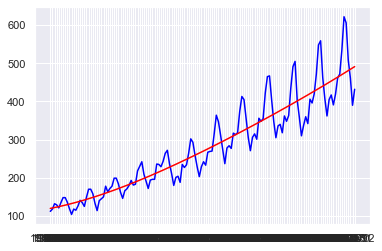

In [129]:
plt.plot(df_data['Month'],df_data['#Passengers'],color='blue')
plt.plot(df_data['Month'],prediksiPoly, color='red')
plt.show()

## =========== Prediksi SVR ===========

In [131]:
from sklearn.svm import SVR
modelSVR = SVR(kernel = 'rbf' , C = 1000 , epsilon = 0.01)

In [132]:
modelSVR.fit(X_train,y_train)

SVR(C=1000, epsilon=0.01)

In [134]:
prediksiSVR = modelSVR.predict(X_train)

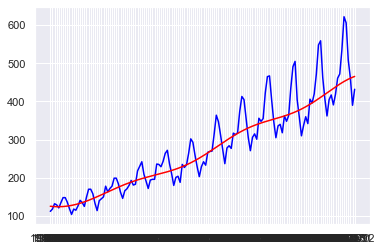

In [135]:
plt.plot(df_data['Month'],df_data['#Passengers'],color='blue')
plt.plot(df_data['Month'],prediksiSVR, color='red')
plt.show()

## =========== Prediksi KRR ===========

In [136]:
from sklearn.kernel_ridge import KernelRidge
modelKRR = KernelRidge(alpha=500, degree=10)

In [137]:
modelKRR.fit(X_train,y_train)

KernelRidge(alpha=500, degree=10)

In [138]:
prediksiKRR = modelKRR.predict(X_train)

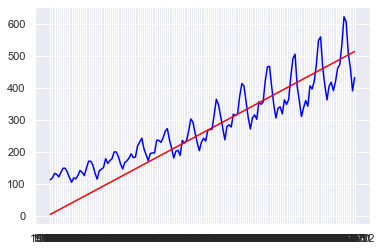

In [139]:
plt.plot(df_data['Month'],df_data['#Passengers'],color='blue')
plt.plot(df_data['Month'],prediksiKRR, color='red')
plt.show()

## =========== Prediksi MLP ===========


In [140]:
from sklearn.neural_network import MLPRegressor
modelMLP = MLPRegressor(hidden_layer_sizes = 5000 ,  max_iter=1000 , random_state = 2 , learning_rate_init = 0.0001)

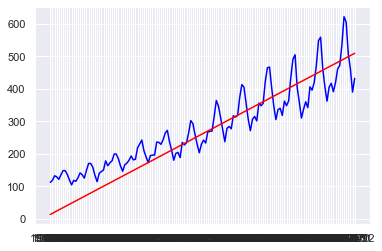

In [141]:
modelMLP.fit(X_train,y_train)
prediksiMLP = modelMLP.predict(X_train)


plt.plot(df_data['Month'],df_data['#Passengers'],color='blue')
plt.plot(df_data['Month'],prediksiMLP, color='red')
plt.show()

# Kesimpulan

#### ARIMA menjadi algoritma yang paling tepat di antara 4 algoritma lainnya yaitu polynomial, SVR, KRR, dan MLP. Bukan karena algoritma tersebut jelek, tetapi algoritma yang paling tepat adalah ARIMA. Hal ini dikarenakan algoritma ARIMA yang paling tepat digunakan kepada data yang memiliki gerak Tren + Seasonal. Dengan hasil RMSE yang kecil sehingga memungkinkan untuk meminimalisir nilai error pada hasil Forecasting.